[目录](./table_of_contents.ipynb)

# 多元高斯模型

多维建模的不确定性

In [17]:
%matplotlib inline

In [18]:
#format the book
import book_format
book_format.set_style()

## 概述

 上一章中的技巧非常强大，但它们只适用于一个变量或维度。它们无法表示多维数据，比如狗在野外的位置和速度。位置和速度是相互关联的，正如我们在g-h章节中学到的，我们不应该丢弃信息。在这一章中，我们将学习如何用概率描述这种关系。通过这个关键的洞察，我们将获得明显更好的过滤器性能。

## 多元正态分布
 
我们一直在用高斯函数来表示标量随机变量$\mathcal{N}(\mu， \sigma^2)$。更正式的术语是“单变量正态”，其中单变量表示“一个变量”。高斯分布的概率分布称为*单变量正态分布*。
 
多元正态分布是什么?*Multivariate*表示多个变量。我们的目标是能够表示多维的正态分布。我并不一定是指空间维度，如果我们追踪飞机在(x, y, z)中的位置，速度和加速度，就会得到一个九维的问题。考虑一个二维的情况。它可能是机器人的*x*和*y*坐标，也可能是狗在x轴上的位置和速度，也可能是奶牛场的产奶量和喂奶速度。这并不重要。我们可以看到，对于$N$维，我们需要$N$ means，我们将其排列在列矩阵(向量)中，如下所示:
$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

假设x = 2, y = 17。我们会

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix} 
$$
 
下一步是表示方差。乍一看，我们可能认为我们还需要N个维度的N个方差。假设x的方差是10 y的方差是4。

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$ 
 
这是不完整的，因为它没有考虑更一般的情况。在**高斯**一章中，我们计算了学生身高的方差。这是高度相对于彼此变化的量度。如果所有学生身高相同，方差是0，如果高度相差很大，方差就会很大。
  
身高和体重也有关系。一般来说，个子高的人比个子矮的人重。身高和体重是相互关联的。我们想要的不仅是我们认为的身高和体重的方差，还有它们相互关联的程度。换句话说，我们想知道重量相对于高度是如何变化的。我们称之为*协方差*。
 
在我们理解多元正态分布之前，我们需要理解相关和协方差背后的数学。

## 协方差和相关系数
 
协方差描述两个变量在一起变化的程度。协方差是*相关方差*的简写。换句话说，方差是一个总体如何变化的度量，而协方差是两个变量相对变化的度量。例如，随着身高的增加，体重通常也会增加。这些变量是*相关的*。它们是*正相关的*，因为当一个变量变大时，另一个变量也会变大。随着室外温度的降低，家庭取暖费用增加。它们是*负相关的*，因为一个变量越大，另一个变量就越小。茶叶的价格和我的狗摇尾巴的次数是没有关系的，我们说它们是*不相关的*或*独立的*——每个都可以独立地改变。
 
相关性可以预测。如果你明显比我高，我可以预测你也比我重。随着冬天的到来，我预计我将花费更多的钱来取暖。即使我的狗再摇尾巴，我也不能断定茶叶价格会发生变化。
 
例如，这是学校田径队上学生的身高和体重的图表。如果一个学生身高68英寸，我可以预测他的体重大约为160磅。由于相关性并不完美，我的预测也不完美。

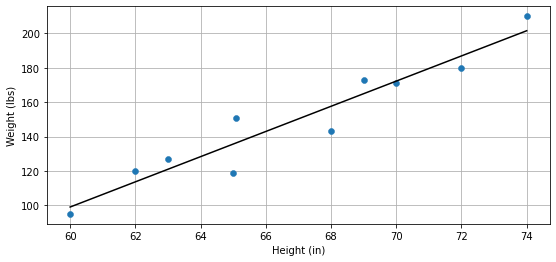

In [19]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

 在本书中，我们只考虑*线性相关*。我们假设变量之间的关系是线性的。也就是说，直线很适合于数据。在上面的图表中，我用一条直线来拟合数据。非线性相关的概念是存在的，但我们不会使用它。
 
$X$和$Y$的协方差方程是

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$
 
其中$\mathbb E[X]$是X的*期望值*，定义为

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x & \mbox{continuous}\end{cases}$$

我们假设每个数据点都是等可能的，因此每个数据点的概率为$\frac{1}{N}$，给出

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$

对于离散的情况，我们将考虑。

比较协方差方程和方差方程。正如你所看到的，它们非常相似:

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$
 
特别是，如果你计算$COV(X, X)$，你就得到了$VAR(X)$的方程，这支持了我的说法，即方差计算随机变量如何在自身之间变化。

我们用一个*协方差矩阵*来表示一个多元正态分布的协方差，它看起来像这样:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$
 
对角线包含每个变量的方差，非对角线元素包含$i^{th}$和$j^{th}$变量之间的协方差。$\sigma_3^2$是第三个变量的方差，$\sigma_{13}$是第一个和第三个变量的协方差。
 
协方差为0表示不相关。如果$x$的方差是10,$y$的方差是4，并且$x$和$y$之间没有线性相关性，那么我们可以写

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$
 
如果$x$和$y$之间有少量的正相关，我们可能会有

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$
 
其中1.2是$x$和$y$之间的协方差。我说相关性“小”是因为1.2的协方差相对于10的方差来说很小。

如果$x$和$y$之间有很大的负相关，我们可能会有
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$
 
协方差矩阵是对称的。毕竟，x$和y$之间的协方差总是等于y$和x$之间的协方差。即$\sigma_{xy}=\sigma_{yx}$ 任意 $x$ 和 $y$.

 我担心我可能会失去你，所以我们来举个例子。在**高斯**一章中，我们有一组学生身高为H=[1.8, 2.0, 1.7, 1.9, 1.6]米。我们计算:

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$

容易,对吧?如果我们对学生进行称重，我们可能会发现他们的体重是W =[70.1, 91.2, 59.5, 93.2, 53.5]。我们能用协方差方程来创建协方差矩阵吗?确定。它看起来像:

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$
 
我们刚刚计算了高度的方差，它在矩阵的左上角。右下角包含权重的方差。用同样的方程，我们得到:

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$

现在的协方差。利用上面的公式，我们计算:

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$

这很乏味，但很简单。我们不会再这样做了，因为NumPy会帮你计算。

In [20]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

那与我们的计算不一致!到底是哪里出了错?什么都没有。NumPy适用于小样本大小的校正;它使用$\frac{1}{N-1}$作为标准化项，而不是$\frac{1}{N}$。
 
这有点超出了本书的范围。简单地说，假设实际班级规模是200名学生，我们抽样5名学生进行计算，因为我们负担不起对所有200名学生进行测量和称重。几乎可以肯定的是，在我们的估计中会有一些错误，因为样本不太可能完美地代表类。当样本容量接近200时，误差将接近0。我们说在后者中没有*偏见*，我们有*无偏估计量*。相反，当我们采用小样本时，存在偏差(误差是非零)，我们有一个*有偏估计量*。
 
如果错误为0，那么除以$N$是有意义的。我不会证明原因，但对于有偏估计，我们使用$\frac{1}{N-1}$来修正小样本容量。NumPy在默认情况下这样做，因为在实践中，我们几乎总是从更大的集合中使用数据样本。如果你想要我们上面计算的无偏估计量，在调用` np.cov`时使用` bias=1`。

In [21]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

这与我们的计算相符。在这本书中，我们不再使用' bias=1 '，因为我们使用的是*随机变量*，它们是从我们跟踪的物体的无限位置集中取样的。这里我们计算的是整个总体的方差和协方差，所以' bias=1 '是正确的。
 
这个矩阵告诉我们什么?它告诉我们高度的方差是0.02 $m^2$而重量的方差是261.788 $kg^2$。此外，它告诉我们体重和身高是正相关的——随着身高的增加，体重也会增加。

让我们创建完全相关的数据。我的意思是，数据完全吻合在一条直线上，与这条直线没有方差。

In [22]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

 从协方差矩阵可以看出协方差等于x和y的方差。

现在让我们给其中一个变量添加一些噪声，这样它们就不再完全相关了。我让$Y$为负，以创造负相关性。

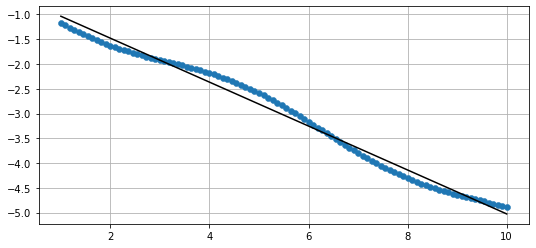

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [23]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

数据不再是一条直线。协方差为$\sigma_{xy}=-3.08$。与$\sigma_x^2$和$\sigma_y^2$的大小相比，它不接近于零，因此我们知道仍然有高度的相关性。我们可以通过图表来验证这一点。这些数据几乎形成一条直线。

现在我将在一条直线上添加随机噪声。

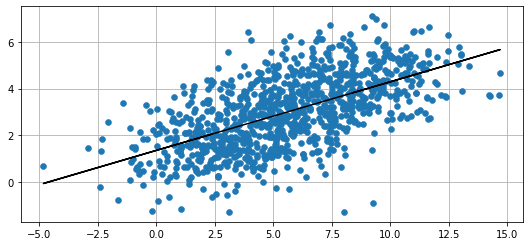

[[10.267  3.01 ]
 [ 3.01   2.417]]


In [24]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

我们看到协方差相对于方差较小，反映了$X$和$Y$之间较低的相关性。我们仍然可以通过这些数据拟合出一条直线，但这些数据的变化要大得多。

最后是完全随机数据之间的协方差。

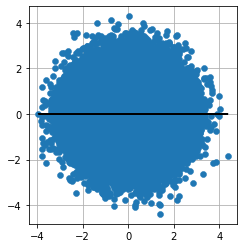

[[ 0.997 -0.001]
 [-0.001  0.996]]


In [25]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

 这里的协方差非常接近于零。从图中可以看出，没有明确的方法来画一条线来匹配数据。一条垂直线和我画的水平线一样令人难以置信。

## 多元正态分布方程
 
回想一下**高斯**一章中的正态分布方程:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$

这是多元正态分布在$n$维度。

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$
 
多元版本仅仅是用矩阵代替单变量方程的标量。如果你对线性代数相当精通，这个方程看起来应该是很容易处理的。如果没有，不要担心，FilterPy和SciPy都提供了函数来为您计算它。让我们暂时忽略计算，把它画出来看看是什么样的。

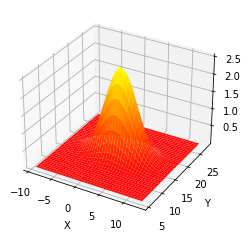

In [26]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

这是一个多元高斯图，均值为$\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$，协方差为$\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$。三维形状显示了任意$(X, Y)$在z轴上的概率密度。我已经将x和y的方差投影到图表的墙上-你可以看到它们呈高斯钟形曲线形状。$X$的曲线比$Y$的曲线宽，而$Y$的曲线可以用$\sigma_x^2=10$和$\sigma_y^2=4$来解释。3D表面的最高点在$X$和$Y$的平均值处。
 
所有多变量高斯函数都是这个形状。如果我们把它看成狗的位置的高斯分布，每个点的z值($X, Y$)就是狗在那个位置的概率密度。严格地说，这是联合概率密度函数，我很快就会定义。所以，狗接近(2,17)的概率最高，接近(5,14)的概率最低，接近(10,10)的概率非常低。与单变量情况一样，这是一个*概率密度*，而不是*概率*。连续分布的范围是无限的，所以恰好在(2,17)或其他点的概率是0。我们可以通过积分计算表面下的体积来计算在给定范围内的概率。

 FilterPy[2]通过` FilterPy .stats. `中的`multivariate_gaussian()`函数实现这个等式。的模块。SciPy的`stats`模块使用`multivariate_normal()`实现多元正规方程。它实现了一种“冻结”形式，您只需设置一次均值和协方差，然后计算任意数量x值除以任意数量调用的概率密度。我将我的函数命名为`multivariate_gaussian()`，以确保它不会与SciPy版本混淆

> The <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">tutorial</a>[1] for the `scipy.stats` module explains 'freezing' distributions and other very useful features.

In [27]:
from filterpy.stats import gaussian, multivariate_gaussian

我将演示如何使用它，然后继续讨论更有趣的事情。
 
首先，如果我们相信狗在(2,7)，x$方差为8,y$方差为3，我们求出狗在(2.5,7.3)的概率密度。
 
首先将$x$设置为(2.5,7.3)。可以使用元组、列表或NumPy数组。

In [28]:
x = [2.5, 7.3]

接下来，我们设定信念的平均值:

In [29]:
mu = [2.0, 7.0]

最后，我们要定义协方差矩阵。在问题陈述中，我们没有提到$x$和$y$之间的任何关联，我们假设没有。这是有道理的。狗可以选择在$x$或$y$的方向上独立行走，而不影响另一方。我将使用变量名`P`。卡尔曼滤波器使用名称$\textbf{P}$作为协方差矩阵，我们需要熟悉约定。

In [30]:
P = [[8., 0.], 
     [0., 3.]]

现在调用函数

In [31]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

 我们可以得到同样的结果由`scipy.stats`模块。 

In [32]:
import scipy
from scipy.stats import multivariate_normal
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')


0.0315


是时候定义一些术语了。联合概率*，表示$P(x,y)$，是$x$和$y$发生的概率。例如，如果你掷两个骰子$P(2,5)$是第一个骰子掷出2第二个骰子掷出5的概率。假设骰子是六面均匀的，则$P(2,5) =\frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$的概率。上面的3D图表显示了联合概率密度函数。
 
边际概率是在不考虑其他事件的情况下某一事件发生的概率。在上面的图表中，左边的高斯曲线是$Y$的边际值。这是不考虑$X$值的情况下，狗在$Y$中任意位置的概率。之前我写过“我已经将x和y的方差投影到图表的墙上”;这些是$x$和$y$的边际概率。高斯的另一个计算好处是一个多元高斯的边际是另一个高斯!

让我们用稍微不同的方式来看待这个问题。我将生成1000个点的分布，而不是绘制一个显示概率分布的曲面$[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$.

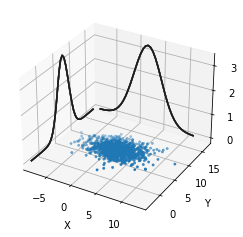

In [33]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

我们可以把抽样点看成是给定特定均值和协方差的狗可能的位置。侧面的等高线表示了$X$和$Y$的边际概率。我们可以看到，他更可能在点多的(2,7)处，而不是在点少的(- 5,5)处。

虽然这些情节很美，但很难从中获得有用的信息。例如，很难判断$X$和$Y$是否都有相同的方差，以及它们之间有多大的相关性。在本书的大部分内容中，我将用等高线图来表示高斯函数。
 
等高线图显示了多元高斯为特定标准偏差所取的值的范围。这就像从3D图中取出一个水平切片。
 
这些图显示了3个标准差下切片的形状。

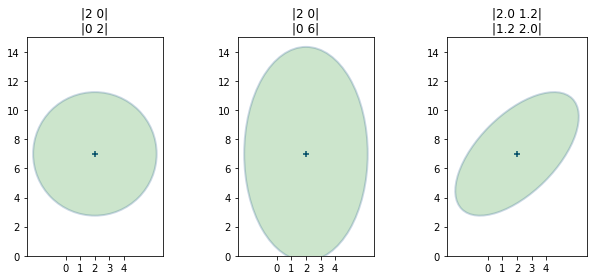

In [34]:
mkf_internal.plot_3_covariances()

For those of you viewing this online or in Juptyer Notebook on your computer, here is an animation of varying the covariance while holding the variance constant.

<img src='animations/multivariate_ellipse.gif'>

(source: http://git.io/vqxLS)

这些图看起来像圆和椭圆。事实上，事实证明，任何通过多元高斯函数的切片都是一个椭圆。因此，在统计学中我们不称这些为“等高线图”，而称它们为“误差椭圆”或“置信椭圆”;这两个术语是可以互换的。
 
这段代码使用了`filterpy.stats`中的`plot_covariance_ellipse()`函数。默认情况下，该函数显示一个标准偏差，但您可以使用`variance`或`std`参数来控制显示的内容。例如，`variance=3**2`或`std=3`将显示第3个标准差，而`variance=[1,4,9]`或`std=[1,2,3]`将显示第1、2和3个标准差。

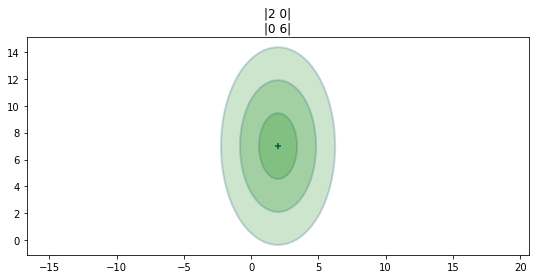

In [35]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

 纯色表示概率分布在标准差之间是常数。这不是真的，你可以从高斯曲线的3D图中看出。下面是协方差($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$的概率分布的二维阴影表示。深灰色代表更高的概率密度。

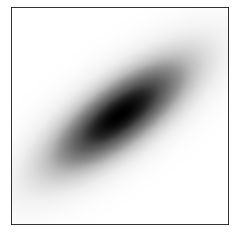

In [36]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

思考这些情节的物理解释，就会澄清它们的意义。第一张图的均值和协方差是

$$
\mathbf{\mu} =\begin{bmatrix}2\\7\end{bmatrix},\, \,
\Sigma = \begin{bmatrix}2&0\\0&2 \end{bmatrix}
$$ 

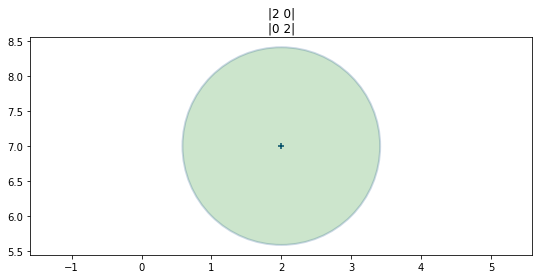

In [37]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

用贝叶斯的方法来思考这个问题椭圆表示了我们信念中的错误量。一个很小的圆表示我们有一个非常小的错误，一个非常大的圆表示我们的信念有很多错误。椭圆的形状显示了$X$和$Y$中误差的几何关系。这里我们有一个圆，所以在$X$和$Y$中出错的可能性是相等的。

第二幅图的均值和协方差是

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&0\\0&6\end{bmatrix}
$$

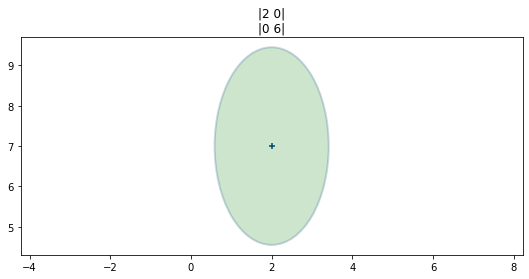

In [38]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

这次我们对$X$ ($\sigma_x^2=2$)和$Y$ ($\sigma^2_y=6$)使用了不同的方差。结果是一个又高又窄的椭圆。我们可以看到Y$比X$有更多的不确定性。在这两种情况下，我们都认为狗在(2,7)，但不确定性是不同的。

第三张图显示了均值和协方差

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&1.2\\1.2&2\end{bmatrix}
$$

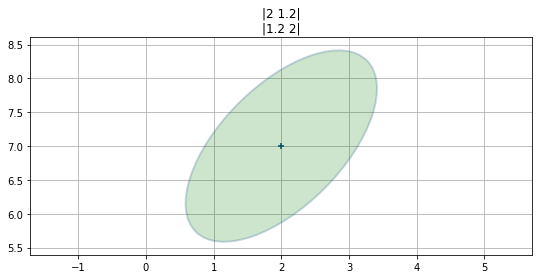

In [39]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

这是第一个在协方差的非对角线元素中有值的等高线，这是第一个倾斜椭圆的等高线图。这不是巧合。这两个事实告诉我们的是同一件事。一个倾斜的椭圆告诉我们$x$和$y$的值在某种程度上是相关的。协方差矩阵中的非对角元素是非零的，表明存在相关性。
 
回想一下身高和体重的关系。它形成了一组倾斜的点。我们可以使用NumPy的`cov()`函数来计算两个或多个变量的协方差，方法是将它们放入一个2D数组中。让我们这样做，然后在数据上方绘制$2\sigma$协方差椭圆。我们需要使用`bias=1`，因为数据代表了整个人群;它不是样品。

In [40]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.525,  135.701],
       [ 135.701, 1092.29 ]])

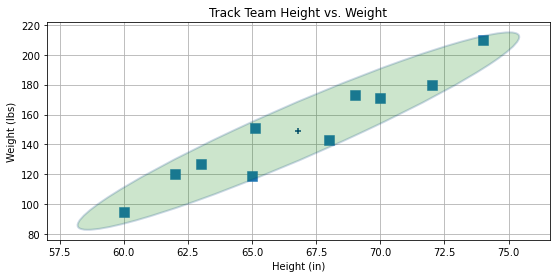

In [41]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

这将帮助您对协方差的含义和使用形成强烈的直觉。协方差椭圆向你展示了数据是如何相互“分散”的。像这样的窄椭圆告诉你数据是非常相关的。对于任何给定的身高，体重的范围都很窄。椭圆向右倾斜，告诉我们有正相关-随着x增加y也增加。如果椭圆向左倾斜，则相关性为负——随着x增加，y减少。我们可以从下面的情节中看到这一点:

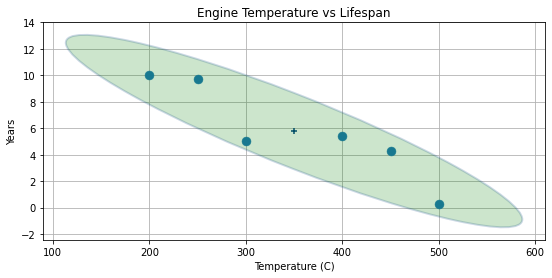

In [42]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

 方差和协方差之间的关系很难通过检验来弄清楚，所以这里有一个交互的图。(如果你以静态形式阅读这篇文章，请在线阅读:https://git.io/vza7b)

In [44]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…

### 皮尔逊相关系数

我们不会在这本书中使用这个系数，但你可能在别处看到它。如果您不感兴趣，可以安全地跳过这一节。

两个变量之间的相关性可以用*Pearson相关系数*给出一个数值。它被定义为

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$

该值的取值范围为-1到1。如果协方差为0，则$\rho=0$。大于0的值表示关系为正相关，负值表示关系为负相关。接近-1或1的值表明相关性非常强，接近0的值表明相关性非常弱。
 
相关和协方差是非常密切相关的。协方差有相关的单位，相关是一个没有单位的比率。例如，我们的狗$\sigma_{xy}$的单位是米的平方。

We can use `scipy.stats.pearsonr` function to compute the Pearson coefficient. It returns a tuple of the Pearson coefficient and of the 2 tailed p-value. The latter is not used in this book. Here we compute $\rho$ for height vs weight of student athletes:
我们可以使用`scipy.stats.pearsonr` 皮尔逊函数，以计算皮尔逊系数。它返回皮尔逊系数和2尾p值的元组。后者在这本书中没有使用。在这里我们计算$\rho$的身高与体重的学生运动员:

In [45]:
from scipy.stats import pearsonr
pearsonr(height, weight)[0]

0.9539731096080193

这里我们计算了发动机温度和寿命之间的关系。

In [46]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527254

## 使用相关性改进估计

假设我们相信狗在(5,10)位置，协方差给定。如果x和y的标准差都是2米，但它们是强相关的，协方差轮廓会是这样的。

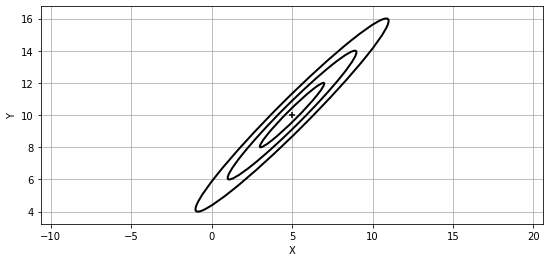

In [47]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

现在假设我告诉你们，我们知道x=7.5。关于$y$的价值我们可以推断出什么?这个位置极有可能位于3$\sigma$协方差椭圆内。我们可以根据协方差矩阵推断出在*y*中的位置，因为*x*和*y*之间存在相关性。我已经用蓝色填充的圆表示了y值的可能范围。

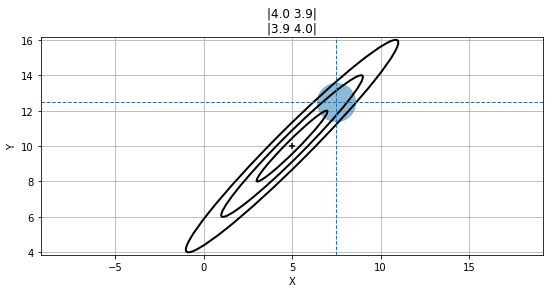

In [48]:
mkf_internal.plot_correlation_covariance()

这个圆在数学上是不正确的，但它让人明白了这个意思。我们将在下一节讨论数学问题。现在认识到，我们可以预测$y$很可能接近12。$y=-10$的值是非常不可能的。
  
一个关于*相关性*和*独立性*的词。如果变量是*独立的*，它们可以单独变化。如果你走在一个开阔的田野，你可以在$x$方向(东西方向)，$y$方向(南北方向)，或它们的任何组合。自变量也总是*不相关的*。除了特殊情况外，相反的情况是不成立的。变量可以是不相关的，但却是相关的。例如，假设$y=x^2$。相关性是一种线性度量，所以$x$和$y$是不相关的。然而，$y$依赖于$x$。

## 用多维高斯分布

在前一章中，我们将不确定的测量与不确定的估计结合起来，方法是将它们的高斯分布相乘。结果是另一个方差较小的高斯分布。如果两条不确定的信息相互印证，我们的结论就应该更确定。图表是这样的:

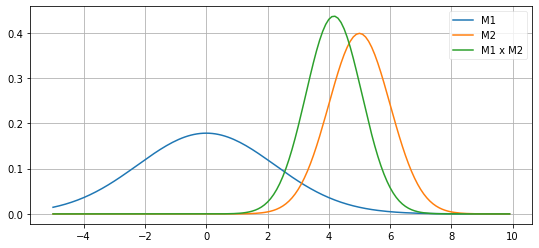

In [49]:
mkf_internal.plot_gaussian_multiply()

测量值1和2的组合产生了更多的确定性，因此新的高斯分布更高更窄——方差变小了。在多维高斯函数中也是如此。
 
这是多元高斯相乘的方程。大写的sigma ($\Sigma$)表示这些是矩阵，而不是标量。具体来说，它们是协方差矩阵:

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$
 
它们是通过将先验和估计的多元高斯函数代入贝叶斯定理而产生的。我在**高斯**一章给了你们关于单变量情况的代数。
 
您将不需要记住这些方程，因为它们是由卡尔曼滤波方程计算的，稍后将介绍。这个计算也可以在FilterPy中使用`multivariate_multiply()`方法进行，您可以从`filterpy.stats`导入该方法。
 
为了给你们一些直观的理解，回想一下单变量高斯相乘的方程:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$
 
这和多元方程的方程很相似。如果你认识到矩阵的逆，即-1次幂，就像倒数一样，因为$AA^{-1} =I$。我将把逆改写成除法这在数学上是不正确的因为矩阵的除法没有定义，但它确实帮助我们比较方程。

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

在这种形式下，一元和多元方程之间的关系是清楚的。
 
现在让我们用一个具体的例子来探讨多元高斯函数。假设我们用两个雷达系统跟踪一架飞机。我会忽略高度，这样我就可以用二维图了。雷达提供目标的距离和方位。一开始我们对飞机的位置不确定，所以协方差，也就是我们对位置的不确定，可能是这样的。用贝叶斯统计的语言来说，这就是我们的先验。

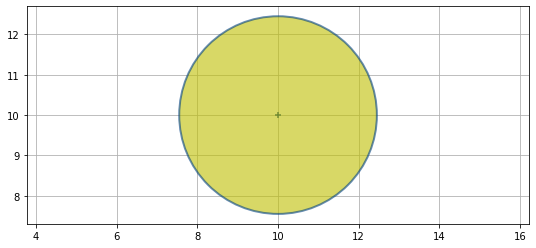

In [50]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

现在假设在飞机的左下方有一个雷达。进一步假设雷达的方位测量是准确的，但距离测量是不准确的。测量误差的协方差可能看起来像这样(在黄色之前的上面用绿色标出):

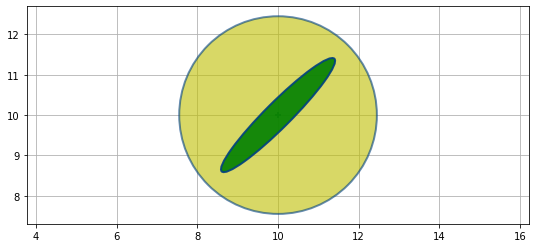

In [51]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

回想一下贝叶斯统计称之为*证据*。椭圆指向雷达。它很长，因为距离测量是不准确的，飞机可能在测量范围内相当大的距离。它非常窄，因为轴承估计是非常精确的，因此飞机必须非常接近轴承估计。
  
我们想要找到*后验*——将证据纳入先验结果的平均值和协方差。就像在其他章节中一样，我们通过将它们相乘来结合证据。

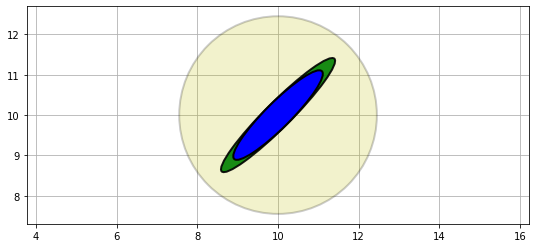

In [52]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

我用非常透明的黄色绘制了原始估计(先前)，雷达读数用绿色(证据)，最终估计(后)用蓝色。
 
后部与雷达测量的形状和位置保持一致，但较小。我们在一维高斯函数中见过。两个高斯函数相乘使得方差更小，因为我们包含了更多的信息，因此不确定性更小。另一点需要认识的是协方差形状反映了飞机和雷达系统的物理布局。这一点的重要性将在下一步变得清晰。
 
现在让我们假设我们从第二个雷达得到测量，这个在右下角。最后一步的后面成为新的先验，我用黄色画出来。新的测量值用绿色标出。

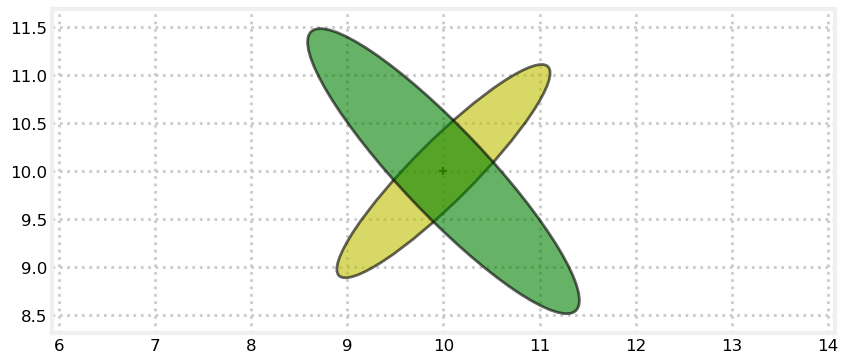

In [36]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

我们将这些信息与高斯函数相乘:

In [53]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

NameError: name 'P3' is not defined

飞机唯一可能的位置是两个椭圆的交点。先验和测量相乘形成的交集是一个新的高斯分布。这些形状反映了问题的几何形状。这使得我们可以对飞机进行三角定位，从而得到一个非常准确的估计。我们没有显式地编写任何代码来执行三角剖分;这是将每个测量值的高斯函数相乘的自然结果。
 
回想一下**g-h Filter**一章，我们在秤上显示了两个重量的误差条。估计值必须落在误差条重叠的区域内。在这里，估价应该在161到163磅之间。

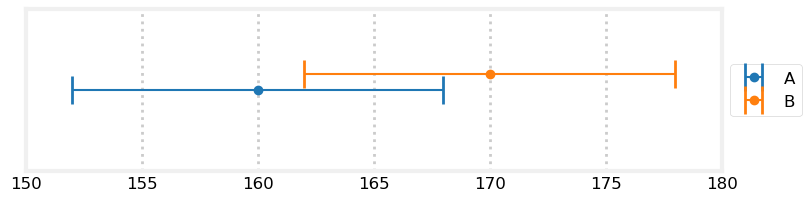

In [38]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

让我们考虑一种不同的布局。假设第一个雷达直接位于飞机的左侧。我可以用它来模拟测量误差
$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

这里我们看到先验与测量值相乘的结果。

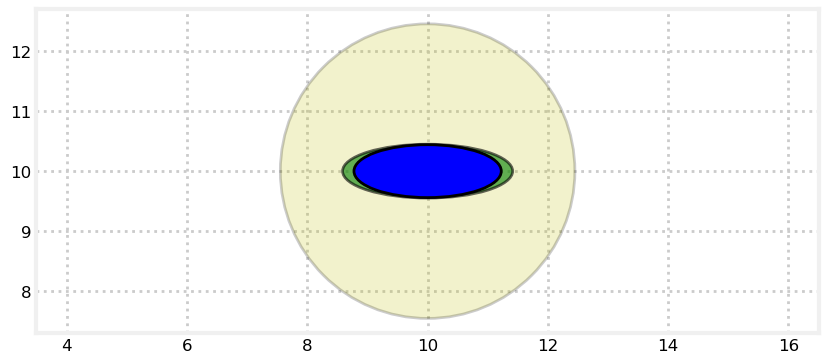

In [39]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

现在，我们可以把第二个雷达系统的测量值合并到一起，我们将把它留在之前的位置。

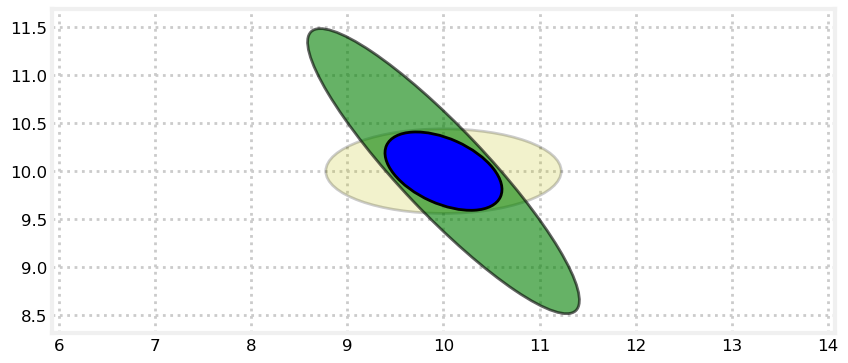

In [40]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

我们的估计不像前一个例子那样准确。相对于飞机的位置，两个雷达站不再互相正交，所以三角测量不是最优的。

最后一个例子，假设在同一台雷达上相隔很短的时间进行两次测量。协方差椭圆将几乎重叠，在我们的新估计中留下一个非常大的误差:

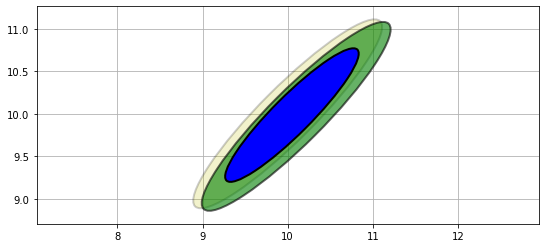

In [54]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')
plt.xlim(6, 14);

## 隐藏变量

您已经可以看到为什么多元卡尔曼滤波器比单变量卡尔曼滤波器性能更好。变量之间的相关性可以显著改善我们的估计。我们可以走得更远。**这部分包含了本章的主要内容，所以请仔细阅读**。
 
假设我们正在跟踪一架飞机，我们得到了以下数据，分别是$t$= 1,2,3秒时的$x$和$y$坐标。你的直觉告诉你$t$=4秒时，$x$的值是多少?

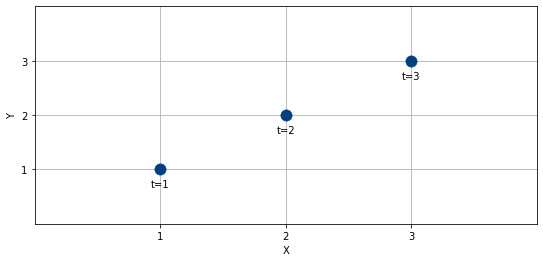

In [55]:
mkf_internal.show_position_chart()

看起来飞机是沿直线飞行的，我们知道飞机不能在极小的地方转弯。最合理的猜测是，在$t$=4时，飞机是(4,4)。我用绿色箭头来表示。

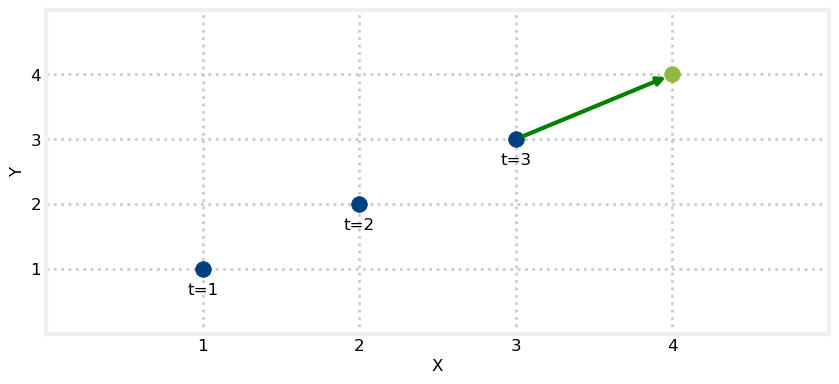

In [43]:
mkf_internal.show_position_prediction_chart()

你做出这个推断是因为你*推断*飞机的速度是恒定的。合理的假设是飞机在每一个时间步进中分别移动一个单位和一个单位。

回想一下**g-h Filter**一章，当我们试图改进嘈杂尺度的权重预测时。我们在公式中加入了“体重增加”，因为它可以让我们更好地预测第二天的体重。g-h过滤器使用$g$参数缩放给当前体重测量的重要程度，而$h$参数缩放给体重增加的重要程度。
 
我们将对卡尔曼滤波器做同样的事情。毕竟，卡尔曼滤波器是g-h滤波器的一种形式。在这个例子中，我们跟踪的是一架飞机，所以我们需要跟踪的不是重量和重量增加，而是位置和速度。体重增加是体重的导数，当然速度是位置的导数。这是不可能绘制和理解4D图表，将需要绘制*x*和*y*和他们各自的速度，所以让我们做它的$x$，知道数学推广到更多维度。

在时间1时，我们可以相当确定位置(x=0)，但不知道速度。我们可以用协方差矩阵画出来。较窄的宽度表示我们对位置的相对确定，较高的高度表示我们对速度的缺乏认识。

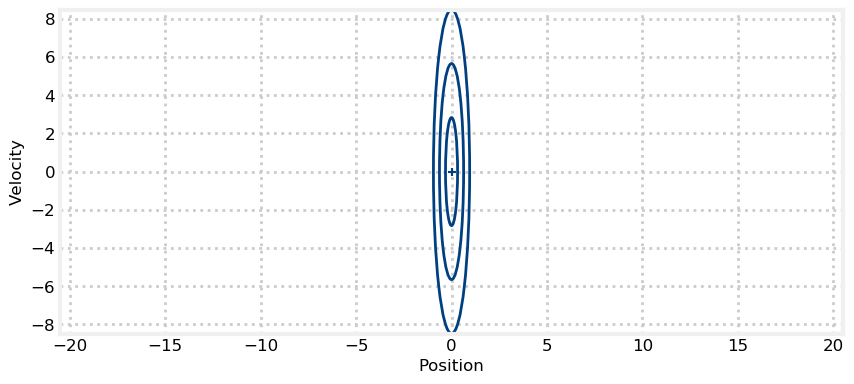

In [44]:
mkf_internal.show_x_error_chart(1)

然而，位置和速度是相关的。如果速度是5m /s，那么1秒内位置就是5m。如果速度是- 10m /s，那么在1秒内位置将是- 10m。我们用对角线上的速度协方差来表示。

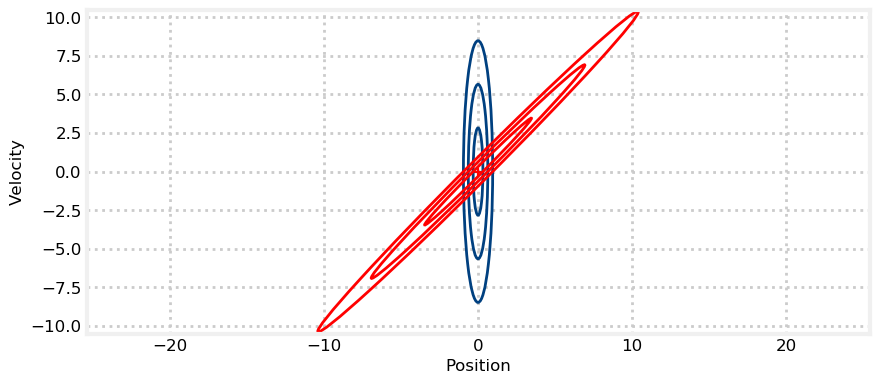

In [45]:
mkf_internal.show_x_error_chart(2)

在这一点上速度协方差没有帮助。我们无法预测一个新的位置，因为我们不知道速度是多少。但一秒钟后，我们得到一个位置更新为x=5。

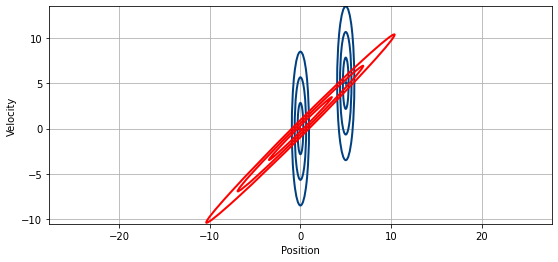

In [56]:
mkf_internal.show_x_error_chart(3)

直到下一章，我才会明白我是如何计算我要说的话的。忽略计算，想想这意味着什么。我们没有简单的方法来确定物体到底在哪里，因为我们对速度很不确定。因此椭圆在x轴上延伸得很远。速度的不确定性意味着它在y轴上也很分散。但正如我在最后一段所说，位置与速度相关。如果速度是5m /s下一个位置就是5，如果速度是10下一个位置就是10。它们是非常相关的，所以椭圆一定很窄。
 
这两个协方差的叠加就是奇迹发生的地方。在时间t=1(其中位置=5)唯一合理的估计是速度协方差和测量协方差的交集!更确切地说，我们可以使用上一节的数学方法将两个协方差相乘。从贝叶斯的观点来看，我们将先验与证据的概率(*可能性*)相乘得到后验。如果我们用贝叶斯方程将位置协方差与速度协方差相乘我们得到这个结果

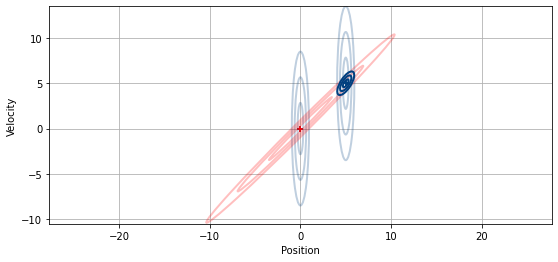

In [57]:
mkf_internal.show_x_error_chart(4)

新的协方差(后验)位于位置协方差和速度协方差的交点。它略有倾斜，表明位置和速度之间有一定的相关性。更重要的是，它比位置或速度的协方差要小得多。在前一章中，我们每次执行'update()'时的方差都会变小，因为之前的估计乘以了新的测量值。这里也是一样。然而，这里的改善明显更好。这是因为我们使用的是两种不同的信息，但它们却是相互关联的。知道大约的速度和它们的相关性以及大约的位置可以让我们做出非常准确的估计。从图中不难看出，位置的不确定性变小了。我们知道这个是因为新的协方差在x轴上没有t=1时的测量协方差那么远。因此，我们不仅对速度更确定，而且对位置也更确定，这比我们只使用位置测量而不考虑速度的情况更确定!

这是重点，所以要仔细阅读!雷达只能探测到飞机的位置。这被称为*可观察变量*。根据位置估计，我们可以计算速度。我们称速度为隐变量。隐藏的意思是它听起来像-没有传感器测量速度，因此它的价值对我们隐藏。我们可以利用位置和速度的相关性非常准确地推断出它的值。
 
更完整的术语还有“未观测到的变量”。例如，飞机的状态包括诸如航向、引擎转速、重量、颜色、飞行员的名字等等。我们不能使用位置传感器直接感知这些，所以它们不会被“观察”。没有办法从传感器测量和相关性中“推断”它们(红色平面并不比白色平面快)，所以它们不是“隐藏”的。相反，它们是“不可观察的”。如果在过滤状态中包含一个未观察到的变量，那么对该变量的估计将是无意义的。

 是什么让这成为可能?想象一下，我们把另一架飞机的速度叠加在位置图上。很明显，这两者之间没有关联，而且将两者结合起来也不可能产生任何额外的信息。相反，这架飞机的速度告诉我们一些非常重要的东西——飞行的方向和速度。只要飞机不改变它的速度速度允许我们预测下一个位置。在相对较小的速度误差后，它与位置很好匹配的概率非常小。想想看，如果你突然改变方向，你的位置也会改变很多。如果测量的位置不是在速度变化的方向上，那就不太可能是正确的。这两者是相关的，所以如果速度改变了，位置也必须以一种可预测的方式改变。
 
重要的是要明白，我们正在利用速度和位置是相关的这一事实。我们从两个测量之间的距离和时间得到一个粗略的速度估计，并使用贝叶斯定理只经过几次观察就得到非常精确的估计。如果你有任何疑问，请重新阅读这一部分。如果你不理解这一点，你很快就会发现不可能推理你将在以下章节学到的东西。
 
在我看来，如果只考虑位置的话，包含速度的效果是微不足道的。但这只是在一次更新之后。在下一章中，我们将看到在多次更新之后，确定性有了多么显著的提高。测量方差会很大，但估计的位置方差会很小。每次与速度协方差相交时它在x轴上就会变窄，因此方差每次也会变小。

## 更高维度

到目前为止，我已经向你们展示了二维高斯函数，但数学并不局限于二维。在后面的章节中，我们将在9维甚至12维中工作。如果您从事天气预报等领域的工作，那么最终可能会有数千个维度。

这些更高维度是什么样子的?二维高斯函数可以用误差椭球表示，所以三维高斯函数可以用三维误差椭球表示。我们不会在这里钻研数学，但这是正确的。`FilterPy`提供了一个函数来绘制这个椭圆。
 
首先，让我们用给定的协方差做一些有噪声的数据，这样我们就可以在椭球内绘制它。

In [48]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

Now we plot the ellipsoid with the `FilterPy` function `plot_3d_covariance`, and then scatter plot the samples.
现在我们用`FilterPy`函数`plot_3d_covariance`绘制椭球面，然后对样本进行散点绘制。

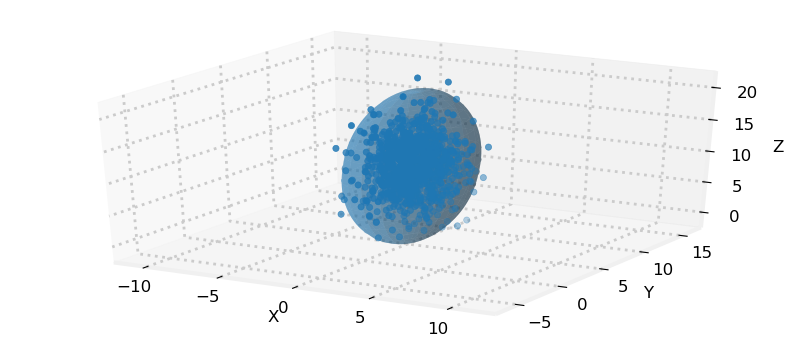

In [49]:
ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);

理论表明，大约99%的分布将落在3个标准差范围内，这似乎是事实。

九个维度?我还没有弄清楚如何在2D屏幕上绘制9D椭球，所以不会有图形。概念是一样的;分布的标准差误差可以用一个9D椭球来描述。

## 总结
 
我们利用了系统的几何和相关关系来产生一个非常精确的估计。数学并不关心我们是在两个位置上工作，还是一个位置和一个相关的速度，或者这些是空间维度。如果房屋面积与房价相关，你可以写一个卡尔曼滤波器来跟踪房价。如果年龄与疾病发病率相关，你可以编写一个卡尔曼滤波器来跟踪疾病。如果僵尸数量与猎枪数量呈负相关，那么你可以编写一个卡尔曼滤波器来跟踪僵尸数量。我从几何学的角度给你们展示过这个，也讲过三角剖分。这只是建立你的直觉。您可以为没有几何表示的状态变量编写一个卡尔曼滤波器，例如股票价格或奶牛的牛奶产量的过滤器(我收到了跟踪牛奶产量的人的电子邮件!)习惯把这些看成是有相关性的高斯函数。如果我们能将不确定性表达为多维高斯函数我们就能将先验与可能性相乘得到更准确的结果。

## 参考文献

- [1] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

- [2] `FilterPy` library. Roger Labbe.
https://github.com/rlabbe/filterpy